<a href="https://colab.research.google.com/github/pavitraa0625/ML-LAB/blob/main/Copy_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== A1: TRAIN Classification Report ===
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.35      0.91      0.51      1433
                     Pepper__bell___healthy       0.36      0.83      0.51      2065
                      Potato___Early_blight       0.36      0.71      0.48      1388
                       Potato___Late_blight       0.36      0.64      0.46      1365
                           Potato___healthy       0.34      0.53      0.42       230
                      Tomato_Bacterial_spot       0.40      0.58      0.48      3016
                        Tomato_Early_blight       0.37      0.42      0.39      1393
                         Tomato_Late_blight       0.42      0.40      0.41      2694
                           Tomato_Leaf_Mold       0.41      0.28      0.33      1325
                  Tomato_Septoria_leaf_spot       0.47      0.28      0.35      2457
Tomato_Spider_mites_Two_

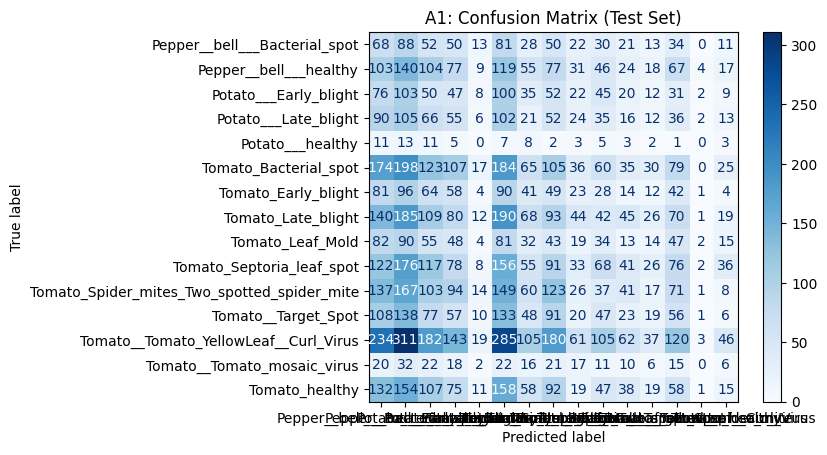


=== A2: REGRESSION METRICS ===
MSE: 0.0000
RMSE: 0.0000
MAPE: 0.0000
R²: 1.0000


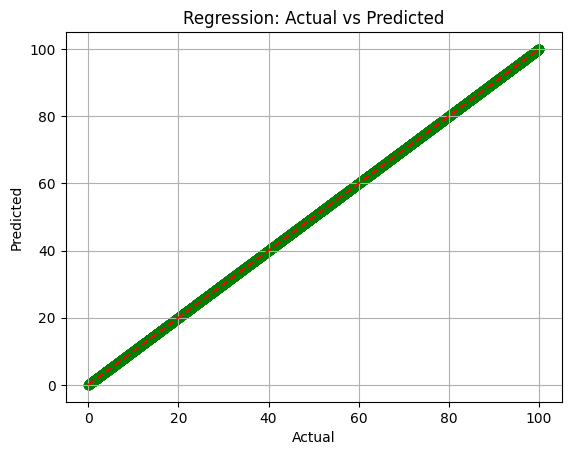

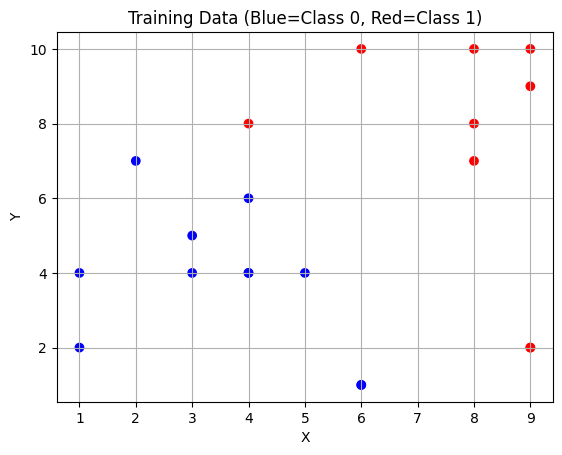

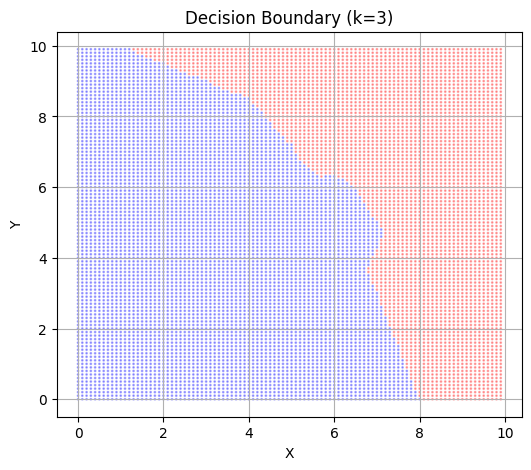

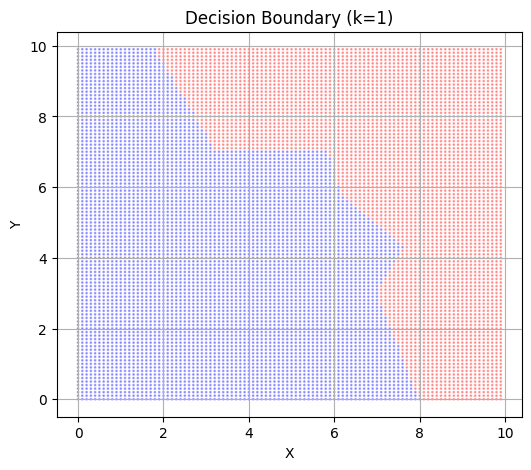

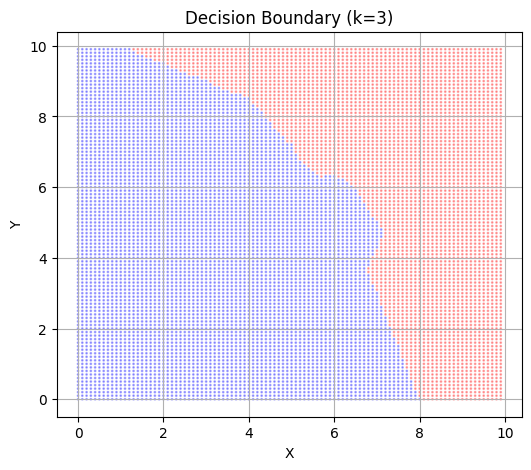

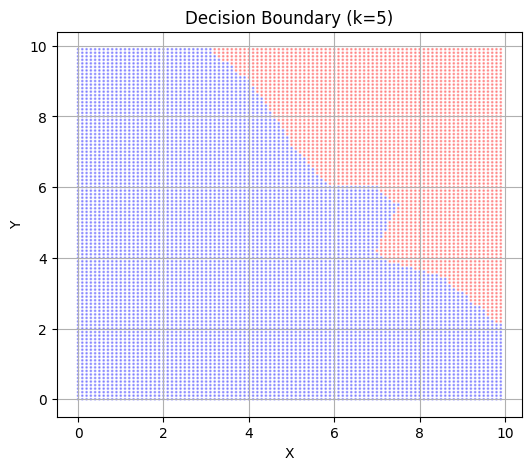

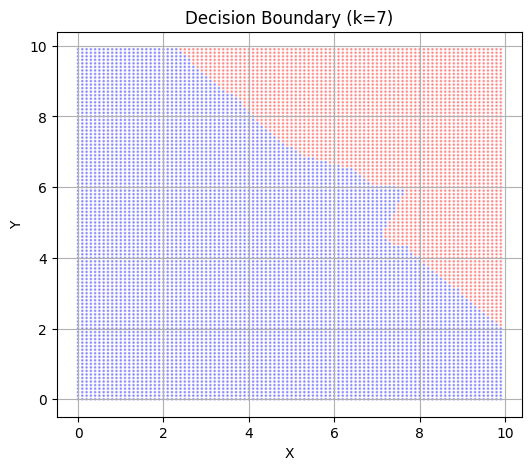

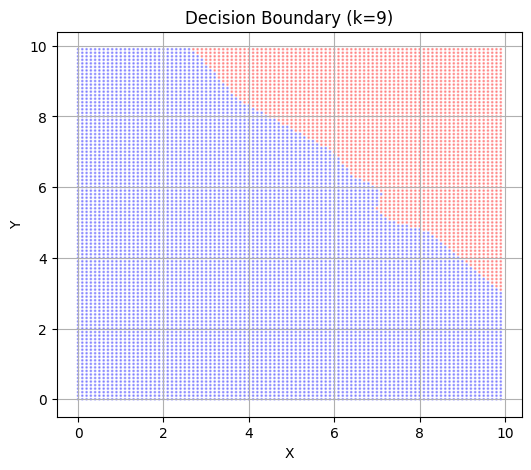

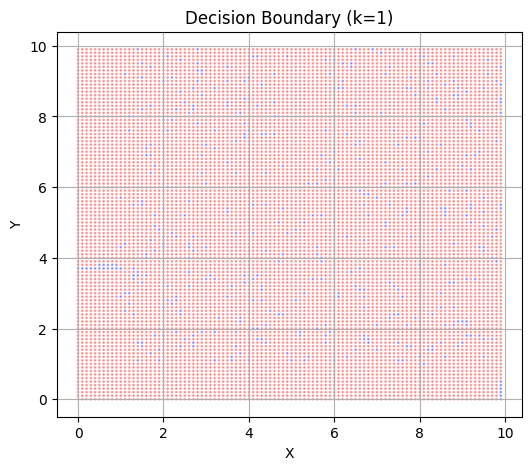

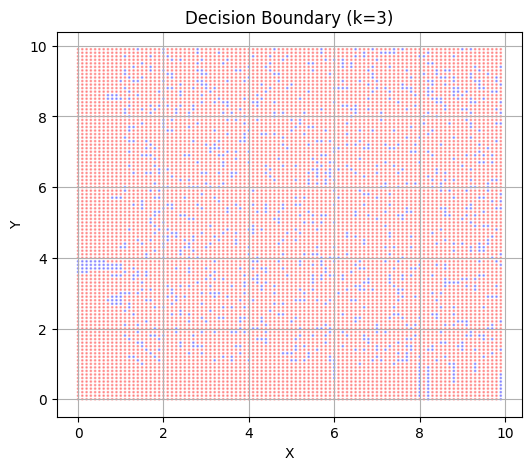

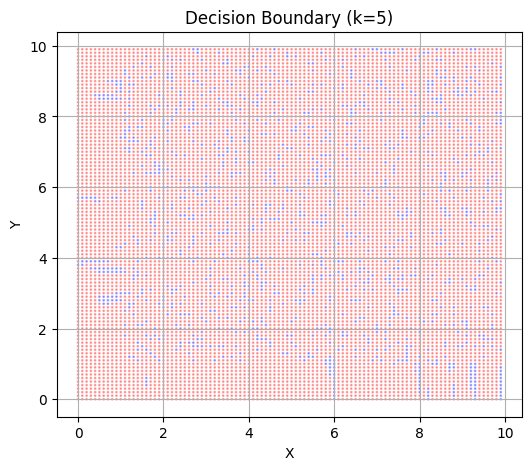

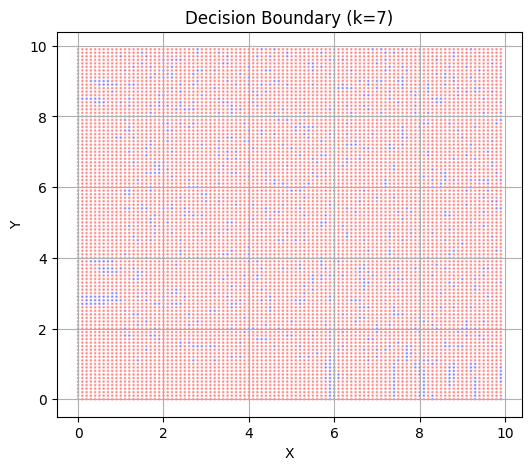

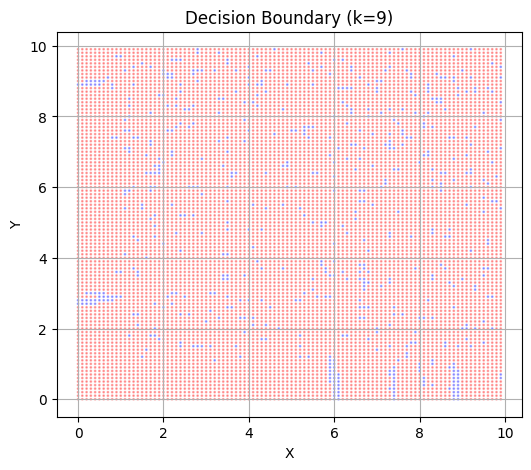


=== A7: GridSearchCV ===
Best k: {'n_neighbors': 19}
Best CV Score: 0.10013079634611863


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score
)
from sklearn.linear_model import LinearRegression

# -----------------------------
# A1: Classification Evaluation
# -----------------------------
def evaluate_knn_classifier(X, y, k=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return X_train, X_test, y_train, y_test, y_pred_train, y_pred_test

def plot_confusion(y_true, y_pred, title):
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

# -----------------------------
# A2: Regression Evaluation
# -----------------------------
def regression_analysis(X):
    np.random.seed(42)
    y = np.random.uniform(0, 100, len(X))  # Simulated regression target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    return y_test, y_pred

def plot_regression_results(y_test, y_pred):
    plt.scatter(y_test, y_pred, alpha=0.6, color='green')
    plt.plot([0, 100], [0, 100], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Regression: Actual vs Predicted')
    plt.grid(True)
    plt.show()

# -----------------------------
# A3–A5: 20 Data Points & kNN Decision Boundary
# -----------------------------
def generate_simple_data():
    np.random.seed(0)
    X = np.random.randint(1, 11, size=(20, 2))
    y = [0 if x + y < 11 else 1 for x, y in X]
    return np.array(X), np.array(y)

def plot_training_data(X, y):
    colors = ['blue' if c == 0 else 'red' for c in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Training Data (Blue=Class 0, Red=Class 1)')
    plt.grid(True)
    plt.show()

def plot_decision_boundary(X_train, y_train, k):
    xx, yy = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
    test_points = np.c_[xx.ravel(), yy.ravel()]

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(test_points)

    colors = ['blue' if label == 0 else 'red' for label in y_pred]
    plt.figure(figsize=(6,5))
    plt.scatter(test_points[:, 0], test_points[:, 1], c=colors, s=1, alpha=0.3)
    plt.title(f'Decision Boundary (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# -----------------------------
# A6: Repeat A3–A5 for Real Project Data
# -----------------------------
def simulate_features_from_project(df):
    np.random.seed(42)
    df['feature1'] = np.random.uniform(1, 10, len(df))
    df['feature2'] = np.random.uniform(1, 10, len(df))
    return df[['feature1', 'feature2']], df['label']

# -----------------------------
# A7: GridSearchCV for Best k
# -----------------------------
def find_best_k(X, y):
    param_grid = {'n_neighbors': list(range(1, 20))}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid.fit(X, y)
    return grid.best_params_, grid.best_score_

# -----------------------------
# 🔁 Main Program Starts Here
# -----------------------------
# Load dataset
df = pd.read_excel('plant_disease_dataset.xlsx')

# === A1: kNN classification and metrics ===
X_class, y_class = simulate_features_from_project(df)
X_train, X_test, y_train, y_test, y_pred_train, y_pred_test = evaluate_knn_classifier(X_class, y_class)

print("=== A1: TRAIN Classification Report ===")
print(classification_report(y_train, y_pred_train))
print("\n=== A1: TEST Classification Report ===")
print(classification_report(y_test, y_pred_test))
plot_confusion(y_test, y_pred_test, "A1: Confusion Matrix (Test Set)")

# === A2: Regression metrics ===
y_test_reg, y_pred_reg = regression_analysis(X_class)
print("\n=== A2: REGRESSION METRICS ===")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_reg, y_pred_reg):.4f}")
print(f"R²: {r2_score(y_test_reg, y_pred_reg):.4f}")
plot_regression_results(y_test_reg, y_pred_reg)

# === A3–A5: 20 synthetic points with class boundaries ===
X_simple, y_simple = generate_simple_data()
plot_training_data(X_simple, y_simple)
plot_decision_boundary(X_simple, y_simple, k=3)
for k in [1, 3, 5, 7, 9]:
    plot_decision_boundary(X_simple, y_simple, k)

# === A6: Real dataset decision boundaries
for k in [1, 3, 5, 7, 9]:
    plot_decision_boundary(X_class.values, pd.factorize(y_class)[0], k)

# === A7: Grid search for best k
best_params, best_score = find_best_k(X_class, y_class)
print("\n=== A7: GridSearchCV ===")
print("Best k:", best_params)
print("Best CV Score:", best_score)
